In [6]:
%pip install pandas nltk textblob vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/nivethikaa/Documents/GitHub/is434_heritageone/google_reviews.csv')

# Handle missing values in the 'description' column
data['description'] = data['description'].fillna('')
print("Initial Data Sample:")
print(data[['description']].head(), "\n")  # Print initial sample


Initial Data Sample:
                                         description
0  I have invited a 3 friends for the dinner.\nTh...
1  Pleased to see a Mangalorean restaurant finall...
2  Good service.   Fish a bit too spicy and lassi...
3  Nothing quite satisfies your taste buds like a...
4  My uncle called me up, excited to tell me abou... 



In [8]:
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nivethikaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nivethikaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nivethikaa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(processed_tokens)

# Apply preprocessing
data['cleaned_description'] = data['description'].apply(preprocess_text)
print("Data after Cleaning and Tokenization:")
print(data[['description', 'cleaned_description']].head(), "\n")  # Print cleaned sample


Data after Cleaning and Tokenization:
                                         description  \
0  I have invited a 3 friends for the dinner.\nTh...   
1  Pleased to see a Mangalorean restaurant finall...   
2  Good service.   Fish a bit too spicy and lassi...   
3  Nothing quite satisfies your taste buds like a...   
4  My uncle called me up, excited to tell me abou...   

                                 cleaned_description  
0  invited friend dinner service fantastic food t...  
1  pleased see mangalorean restaurant finally ope...  
2  good service fish bit spicy lassi sweet probab...  
3  nothing quite satisfies taste bud like authent...  
4  uncle called excited tell mangalorean place si...   



#### convert the relative dates (like "a month ago") to actual dates.

In [10]:
from datetime import datetime, timedelta

# Function to convert relative dates to actual dates
def convert_relative_date(relative_date):
    if 'a month ago' in relative_date:
        return datetime.now() - timedelta(days=30)
    elif 'months ago' in relative_date:
        months_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=months_ago * 30)
    elif 'a week ago' in relative_date:
        return datetime.now() - timedelta(weeks=1)
    elif 'weeks ago' in relative_date:
        weeks_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(weeks=weeks_ago)
    elif 'a day ago' in relative_date:
        return datetime.now() - timedelta(days=1)
    elif 'days ago' in relative_date:
        days_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=days_ago)
    else:
        return None  # Handle other cases as necessary


In [11]:
# Convert date column
data['date'] = data['date'].apply(convert_relative_date)
print("Converted Dates Sample:")
print(data[['date']].head(), "\n")  # Print converted dates sample


Converted Dates Sample:
                        date
0 2024-09-25 12:24:22.803635
1 2024-05-28 12:24:22.803643
2 2024-09-25 12:24:22.803645
3 2024-04-28 12:24:22.803646
4 2024-03-29 12:24:22.803648 



In [12]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)  # Analyze sentiment
    # Classify sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'


In [13]:
# Apply sentiment analysis
data['sentiment'] = data['cleaned_description'].apply(get_sentiment)
print("Data with Sentiment Analysis Results:")
print(data[['cleaned_description', 'sentiment']].head(), "\n")  # Print sample with sentiment


Data with Sentiment Analysis Results:
                                 cleaned_description sentiment
0  invited friend dinner service fantastic food t...  positive
1  pleased see mangalorean restaurant finally ope...  positive
2  good service fish bit spicy lassi sweet probab...  positive
3  nothing quite satisfies taste bud like authent...  positive
4  uncle called excited tell mangalorean place si...  positive 



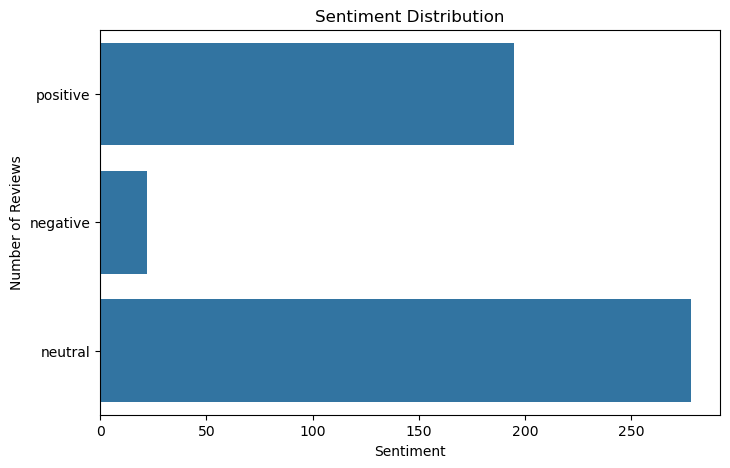

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [15]:
# Aggregate sentiment over time
sentiment_over_time = data.groupby(data['date'].dt.to_period('M')).size()

# Check if sentiment_over_time is empty before plotting
if sentiment_over_time.empty:
    print("No sentiment data available for the specified date range.")
else:
    # Print sentiment trends
    print("Sentiment Trend Over Time:")
    print(sentiment_over_time, "\n")


Sentiment Trend Over Time:
date
2023-11     4
2023-12     3
2024-02    10
2024-03    19
2024-04    19
2024-05     9
2024-06     8
2024-07     4
2024-08     4
2024-09     4
2024-10     1
Freq: M, dtype: int64 



In [16]:
%pip install wordcloud matplotlib pandas nltk


Note: you may need to restart the kernel to use updated packages.


/var/folders/ql/jrpypjjx1zld2ngtdy0tz54r0000gn/T/ipykernel_33788/1791386051.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['description'] = sentiment_data['description'].fillna('')


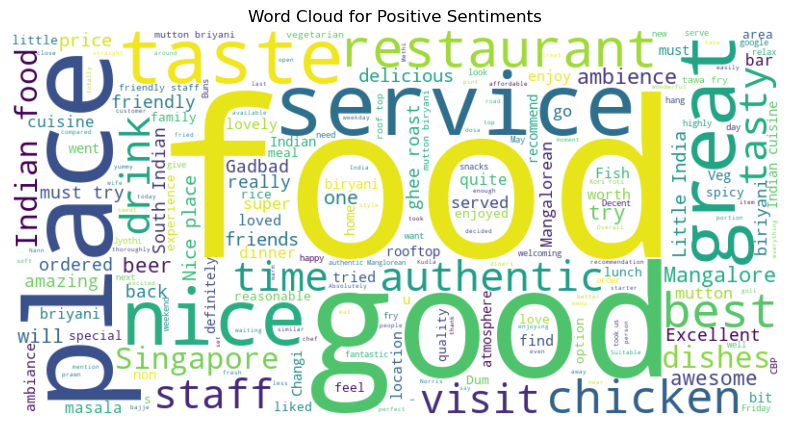

One-line excerpts from reviews containing top words for Positive sentiment:
- I have invited a 3 friends for the dinner
- Nothing quite satisfies your taste buds like an authentic Manglorean meal!

This was my first time in more than a year trying Manglorean food and Kudla Village did not disappoint
- My uncle called me up, excited to tell me about this mangalorean place in Singapore
- Good food and amazing atmosphere
- Chittinadu food super and   must try Dindigul biryani   and  Beach prawn  🍺 good combination  and service staff very  friendly
- Was here with friends for a Sunday lunch and was unsure as it was a new establishment
- Found this place luckily on google
- Loved this place
- Kudla village was a complete surprise for me
- Me and my wife had a lovely experience here
- Updated: pop by this place for stella pints/cuisine as I was in the vincinty
- One of the best Mangalore food in Singapore
- Delicious food, lovely staff, great prices and nice cool beer!
- One of the best food

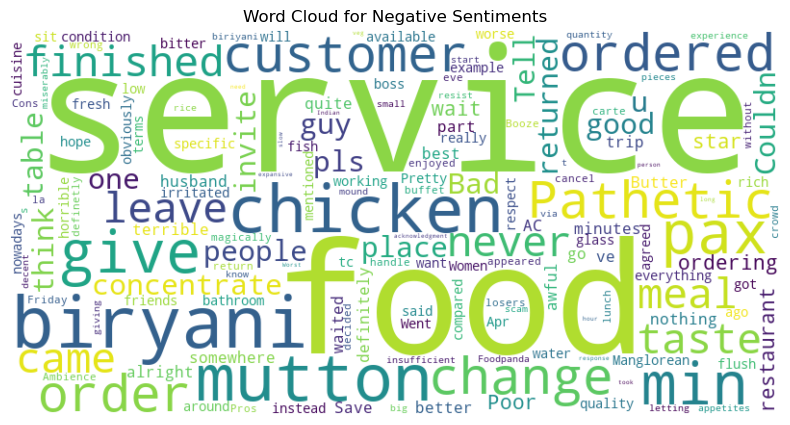

One-line excerpts from reviews containing top words for Negative sentiment:
- The best part was the AC
- Pretty pathetic place in terms of customer service! Went there on 27 Apr with friends
- The best part was the AC
- They are too specific nowadays
- Pretty pathetic place in terms of customer service! Went there on 27 Apr with friends
- Pros : Food was good
Order A la carte
Booze all enjoyed

Cons : Service was not good , Couldn handle the crowd on Friday eve
People who ordered buffet are the losers

If you think you can invite 30 pax by ordering for 28 pax it’s definetly the wrong place

You have to order for 30 pax and invite 15 pax

And since ours was a bad experience am letting you all know

(The quantity was insufficient for big appetites )

That 1 start is because the food was decent couldn’t resist giving a star
- Poor service with no acknowledgment
- Worst service
- Very slow service need to wait for more than 20 mins for food to get into table
- Pathetic service
- They are t

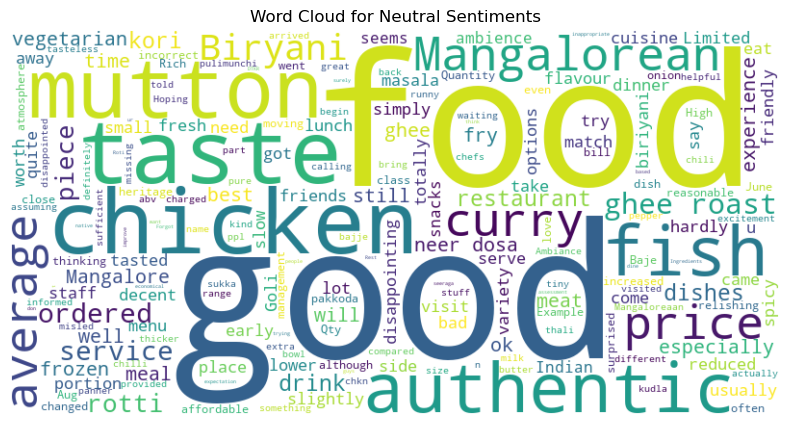

One-line excerpts from reviews containing top words for Neutral sentiment:
- Authentic Mangalore Food is still not here! I went thinking of relishing the dishes that I love,  although food is decent it is no where even slightly close to a good mangalorean food
- I often came to heritage for drinks,side dishes and dinner with my friends
- I was quite disappointed
- To begin with there is no taste of  “authentic Mangalorean food” but just the menu
- Forgot how the ghee roast tastes after trying the chicken ghee roast here
- For dine in, especially for dinner, it's a good place with variety of food and drinks and economical as well
- Usually their food is tasty, and good service but today I got bad experience, when ordered chicken biriyani they brought mutton biriyani, after claiming this is not the initial order simply they replaced mutton pieces with 'curry chicken'
- You can eat peacefully and relaxly
- While the food is reasonably priced and taste above satisfactory, the service is ap

In [17]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the CSV file
data = pd.read_csv('google_reviews.csv')

# Preprocess ratings to categorize sentiment
def categorize_sentiment(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating >= 2.0:
        return 'neutral'
    else:
        return 'negative'

# Apply the categorize function to the 'rating' column
data['sentiment'] = data['rating'].apply(categorize_sentiment)

# Define a function to create and display word cloud and fetch reviews
def generate_wordcloud_with_reviews(data, sentiment):
    # Filter data for the specific sentiment
    sentiment_data = data[data['sentiment'] == sentiment]
    
    # Replace NaN values in 'description' column with empty strings
    sentiment_data['description'] = sentiment_data['description'].fillna('')
    
    # Combine all reviews into one text string
    text = ' '.join(sentiment_data['description'].tolist())
    
    # Define a set of stopwords (common words to exclude)
    stopwords = set(STOPWORDS)
    
    # Create a word cloud while excluding stop words
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiments')
    plt.show()
    
    # Get the top words from the word cloud, excluding stop words
    word_list = [word for word in text.split() if word.lower() not in stopwords]
    word_freq = Counter(word_list)
    top_words = [word for word, freq in word_freq.most_common(10)]  # Get the top 10 meaningful words
    
    # Print one-line excerpts from the reviews containing the top words
    print(f"One-line excerpts from reviews containing top words for {sentiment.capitalize()} sentiment:")
    for word in top_words:
        
        # Use regular expression for exact word match
        reviews = sentiment_data[sentiment_data['description'].apply(lambda x: bool(re.search(rf'\b{word}\b', x, re.IGNORECASE)))]['description'].tolist()
        for review in reviews:
            # Print only the first line of each review
            first_line = review.split('.')[0]  # Get the text before the first period (.)
            print(f"- {first_line}")

# Generate word clouds and display one-line review excerpts for each sentiment
generate_wordcloud_with_reviews(data, 'positive')
generate_wordcloud_with_reviews(data, 'negative')
generate_wordcloud_with_reviews(data, 'neutral')


### Using incrementer and decrementer for sentiment analysis

In [18]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

# Load data from the CSV file
df = pd.read_csv('google_reviews.csv')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define the phrasebook for incrementers, decrementers, and inverters
phrasebook = {
    'incrementers': {
        "very": 2, 
        "so": 2, 
        "amazingly": 2, 
        "extremely": 2, 
        "incredibly": 2, 
        "super": 2, 
        "exceptionally": 2
    },
    'decrementers': {
        "a bit": 0.5, 
        "slightly": 0.5, 
        "barely": 0.25, 
        "somewhat": 0.75, 
        "kind of": 0.75, 
        "a little": 0.75
    },
    'inverters': {
        "not good": -1, 
        "not bad": 1, 
        "lack of": -1, 
        "opposite of": -1, 
        "hardly": -1,
        "not impressive": -1
    }
}

# Function to extract positive and negative words
def extract_positive_negative_words(text):
    if isinstance(text, str):  # Check if input is a string
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        
        # Placeholder logic for identifying positive and negative words
        positive_words = [word for word in words if len(word) > 3]
        negative_words = [word for word in words if len(word) <= 3]
    else:
        positive_words = []
        negative_words = []
    
    return positive_words, negative_words, len(words)  # Return word count as well

# Function to adjust the score using the phrasebook
def apply_phrasebook(text, base_score):
    score = base_score

    if isinstance(text, str):  # Only process valid strings
        # Apply incrementers (multiply sentiment score)
        for phrase, multiplier in phrasebook['incrementers'].items():
            if re.search(r'\b' + phrase + r'\b', text, re.IGNORECASE):
                score *= multiplier

        # Apply decrementers (reduce sentiment score)
        for phrase, multiplier in phrasebook['decrementers'].items():
            if re.search(r'\b' + phrase + r'\b', text, re.IGNORECASE):
                score *= multiplier

        # Apply inverters (reverse sentiment)
        for phrase, invert_score in phrasebook['inverters'].items():
            if re.search(r'\b' + phrase + r'\b', text, re.IGNORECASE):
                score = -abs(score) if invert_score == -1 else abs(score)

    return score

# Function to calculate normalized sentiment score
def sentiment_score(text):
    base_score = 0
    positive_words, negative_words, word_count = extract_positive_negative_words(text)

    # Apply the basic sentiment score based on word categories
    base_score += len(positive_words) - len(negative_words)

    # Modify sentiment using the phrasebook
    final_score = apply_phrasebook(text, base_score)

    # Normalize the final score by the word count to make it length-agnostic
    if word_count > 0:
        normalized_score = final_score / word_count
    else:
        normalized_score = 0  # Handle case where word count is 0 (empty review)

    return normalized_score

# Handle missing descriptions by replacing NaN with empty strings
df['description'] = df['description'].fillna('')

# Apply sentiment analysis to each review
df['sentiment_score'] = df['description'].apply(sentiment_score)

# Sort the DataFrame by sentiment score in ascending order (lowest to highest)
df_sorted = df.sort_values(by='sentiment_score')

# Save the sorted reviews to a new CSV file
df_sorted.to_csv('google_reviews_normalized_sorted_by_sentiment.csv', index=False)

# Print sorted DataFrame for verification (optional)
print(df_sorted[['user_name', 'description', 'sentiment_score']])


                   user_name  \
37       Clement Mascarenhas   
205                        A   
73                Marcus Tan   
85            Shabari Girish   
247     Raja Muthuramalingam   
..                       ...   
94          Naveen Kumar P N   
56              Suresh Kumar   
9    Food vloggers Singapore   
46             Prasan Shetty   
174             David Dubier   

                                           description  sentiment_score  
37   To begin with there is no taste of  “authentic...        -1.604396  
205                                                 Ok        -1.000000  
73   While the food is reasonably priced and taste ...        -0.793103  
85   Pros : Food was good\nOrder A la carte\nBooze ...        -0.490196  
247                                                            0.000000  
..                                                 ...              ...  
94   Very good restaurant... Mutton biryani is a mu...         2.545455  
56   For dine in, espec

Positive Review Word Cloud:


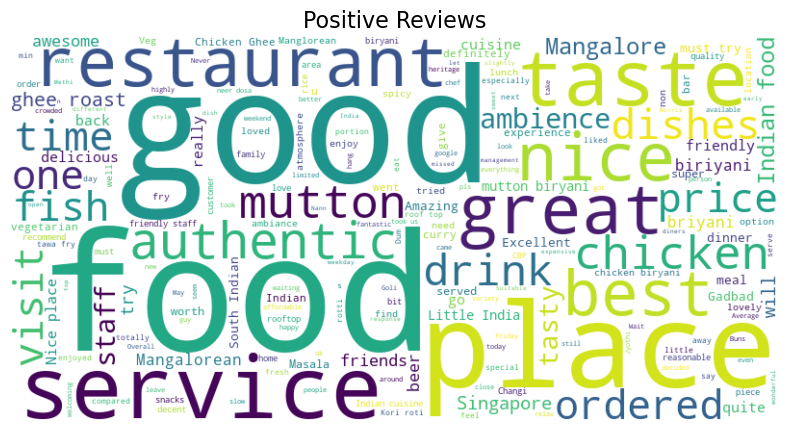

Negative Review Word Cloud:


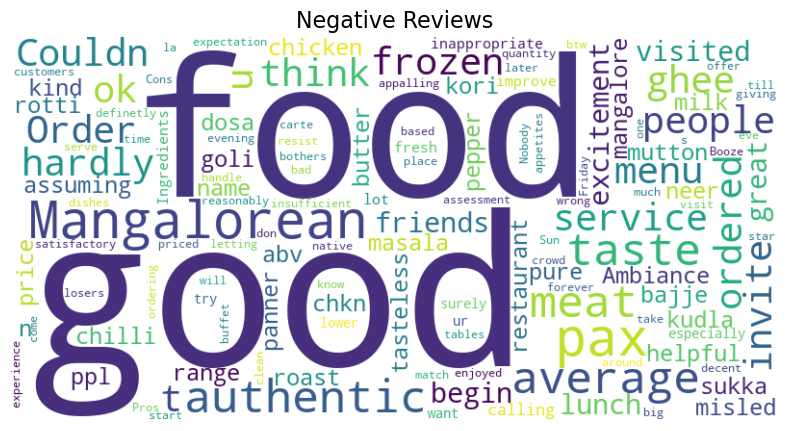

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Function to categorize reviews into positive, negative, and neutral
def categorize_review(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization based on sentiment score
df_sorted['category'] = df_sorted['sentiment_score'].apply(categorize_review)

# Create a function to generate a word cloud from the text of reviews
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate reviews into positive, negative, and neutral categories
positive_reviews = df_sorted[df_sorted['category'] == 'positive']['description'].astype(str)
negative_reviews = df_sorted[df_sorted['category'] == 'negative']['description'].astype(str)


# Generate and plot word clouds for each category
print("Positive Review Word Cloud:")
generate_wordcloud(positive_reviews, 'Positive Reviews')

print("Negative Review Word Cloud:")
generate_wordcloud(negative_reviews, 'Negative Reviews')



In [21]:
from wordcloud import STOPWORDS
from collections import Counter
import re

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Split by whitespace
    words = [word for word in words if word not in STOPWORDS]  # Remove stopwords
    return words

# Generate a word frequency counter for each category
def get_word_frequencies(reviews):
    all_words = []
    for review in reviews:
        all_words.extend(clean_and_tokenize(review))
    return Counter(all_words)

# Get word frequencies for positive and negative reviews
positive_word_freq = get_word_frequencies(positive_reviews)
negative_word_freq = get_word_frequencies(negative_reviews)

# Find the top 3 common words between positive and negative reviews
common_words = list((positive_word_freq & negative_word_freq).elements())
top_3_common_words = Counter(common_words).most_common(3)
top_3_words = [word for word, _ in top_3_common_words]

# Function to filter reviews containing any of the top 3 words
def filter_reviews_by_words(reviews, words):
    filtered_reviews = []
    for review in reviews:
        if any(word in review.lower() for word in words):
            filtered_reviews.append(review)
    return filtered_reviews

# Filter reviews containing the top 3 common words
positive_reviews_with_top_words = filter_reviews_by_words(positive_reviews, top_3_words)
negative_reviews_with_top_words = filter_reviews_by_words(negative_reviews, top_3_words)

# Print the reviews that contain the top 3 common words
print("Positive Reviews with Top 3 Common Words:")
for review in positive_reviews_with_top_words:
    print(review)

print("\nNegative Reviews with Top 3 Common Words:")
for review in negative_reviews_with_top_words:
    print(review)


Positive Reviews with Top 3 Common Words:
Decent place for South Indian foodies.. esp for non veg
Nice food to try
The food is quite nice, especially the biryanis. Good place for weekday drinks. A bit crowded on Fridays. The service is ok, sometime slow and missed orders.
Wonderful restaurant to enjoy food with family and friends a bit expensive but good taste of food
Good service.   Fish a bit too spicy and lassi too sweet. Probably suitable for native diners
New addition in CBP, good for indian food esp. Tasty south Indian food...
Nice n cozy place to have drinks n enjoy game. Have good South Indian Veg n Non-Veg dishes to choose from. A little more variety of draught beers would have been great.
As of June 2024, restaurant management has changed and is moving away from Mangalorean cuisine. There still are a few Mangaloreaan dishes like pulimunchi, neer dosa that can still be ordered, but taste is slightly different from the authentic stuff.
Authentic Mangalore Food is still not here